In [117]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [118]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [119]:
train_input.shape

(60000, 28, 28)

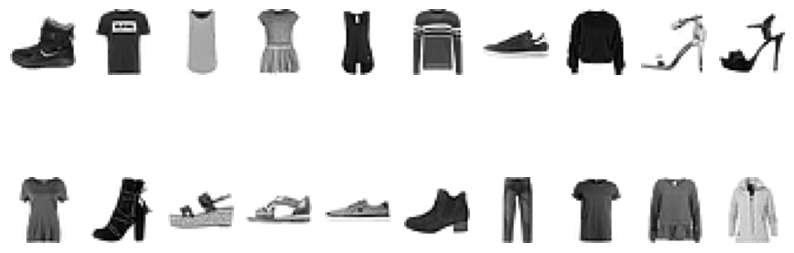

In [120]:
fig,axs = plt.subplots(2,10,figsize=(10,4))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')

In [121]:
# train_set - train 세트, 검증 세트, test 세트로 분리
# 표준화 작업
train_scaled = train_input.reshape(-1,28,28,1)/255
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42 # 실제엔 random_state 제외
)

In [122]:
# 3차원: train_scaled = train_scaled.reshape(-1, 28*28*3) --> Flatten 추가로 대체

1차 합성곱 층 생성

In [123]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding = 'same'(패딩 사용O),'vaild'(패딩 사용X)
# input_shape = (28,28,1), 사이즈 28*28 그레이 색상 1개, (28,28,3) - 사이즈 28*28, RGB 색상 3개
# Conv2D: 한 칸씩 이동하면 겹침, strides=1(기본), 더 많은 훈련 목적(+padding)
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same', # 선언
          input_shape=(28,28,1)))
# Pooling2D: 사이즈 줄이기 목적, 가중치 계산X, strides=2(기본)
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2차 합성곱 층 생성

In [124]:
# 2차 합성곱 신경망 생성
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [125]:
model.add(keras.layers.Flatten()) # 1차원 행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [126]:
model.summary()

# conv2d param_size: kernel_size (3,3) * 깊이(1) * 필터(32개) + 32 --> 3*3*1*32 + 32 = 320
# MaxPooling2D: 사이즈가 절반으로 변경
# Flatten: 1차원 행렬로 변경 (14*14*32 = 6272)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

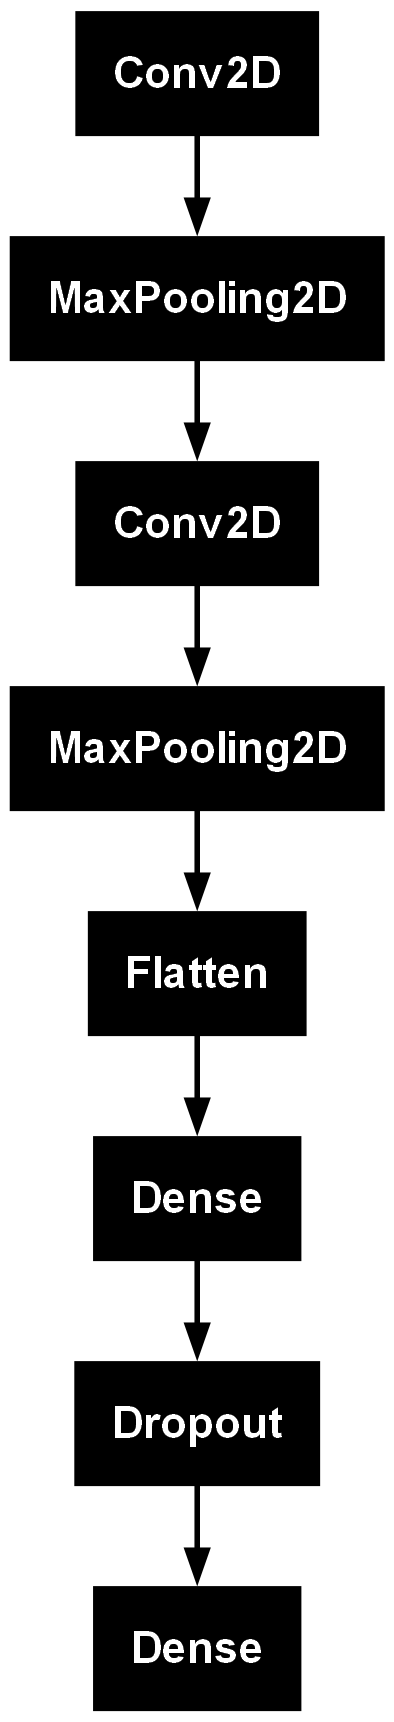

In [127]:
keras.utils.plot_model(model)

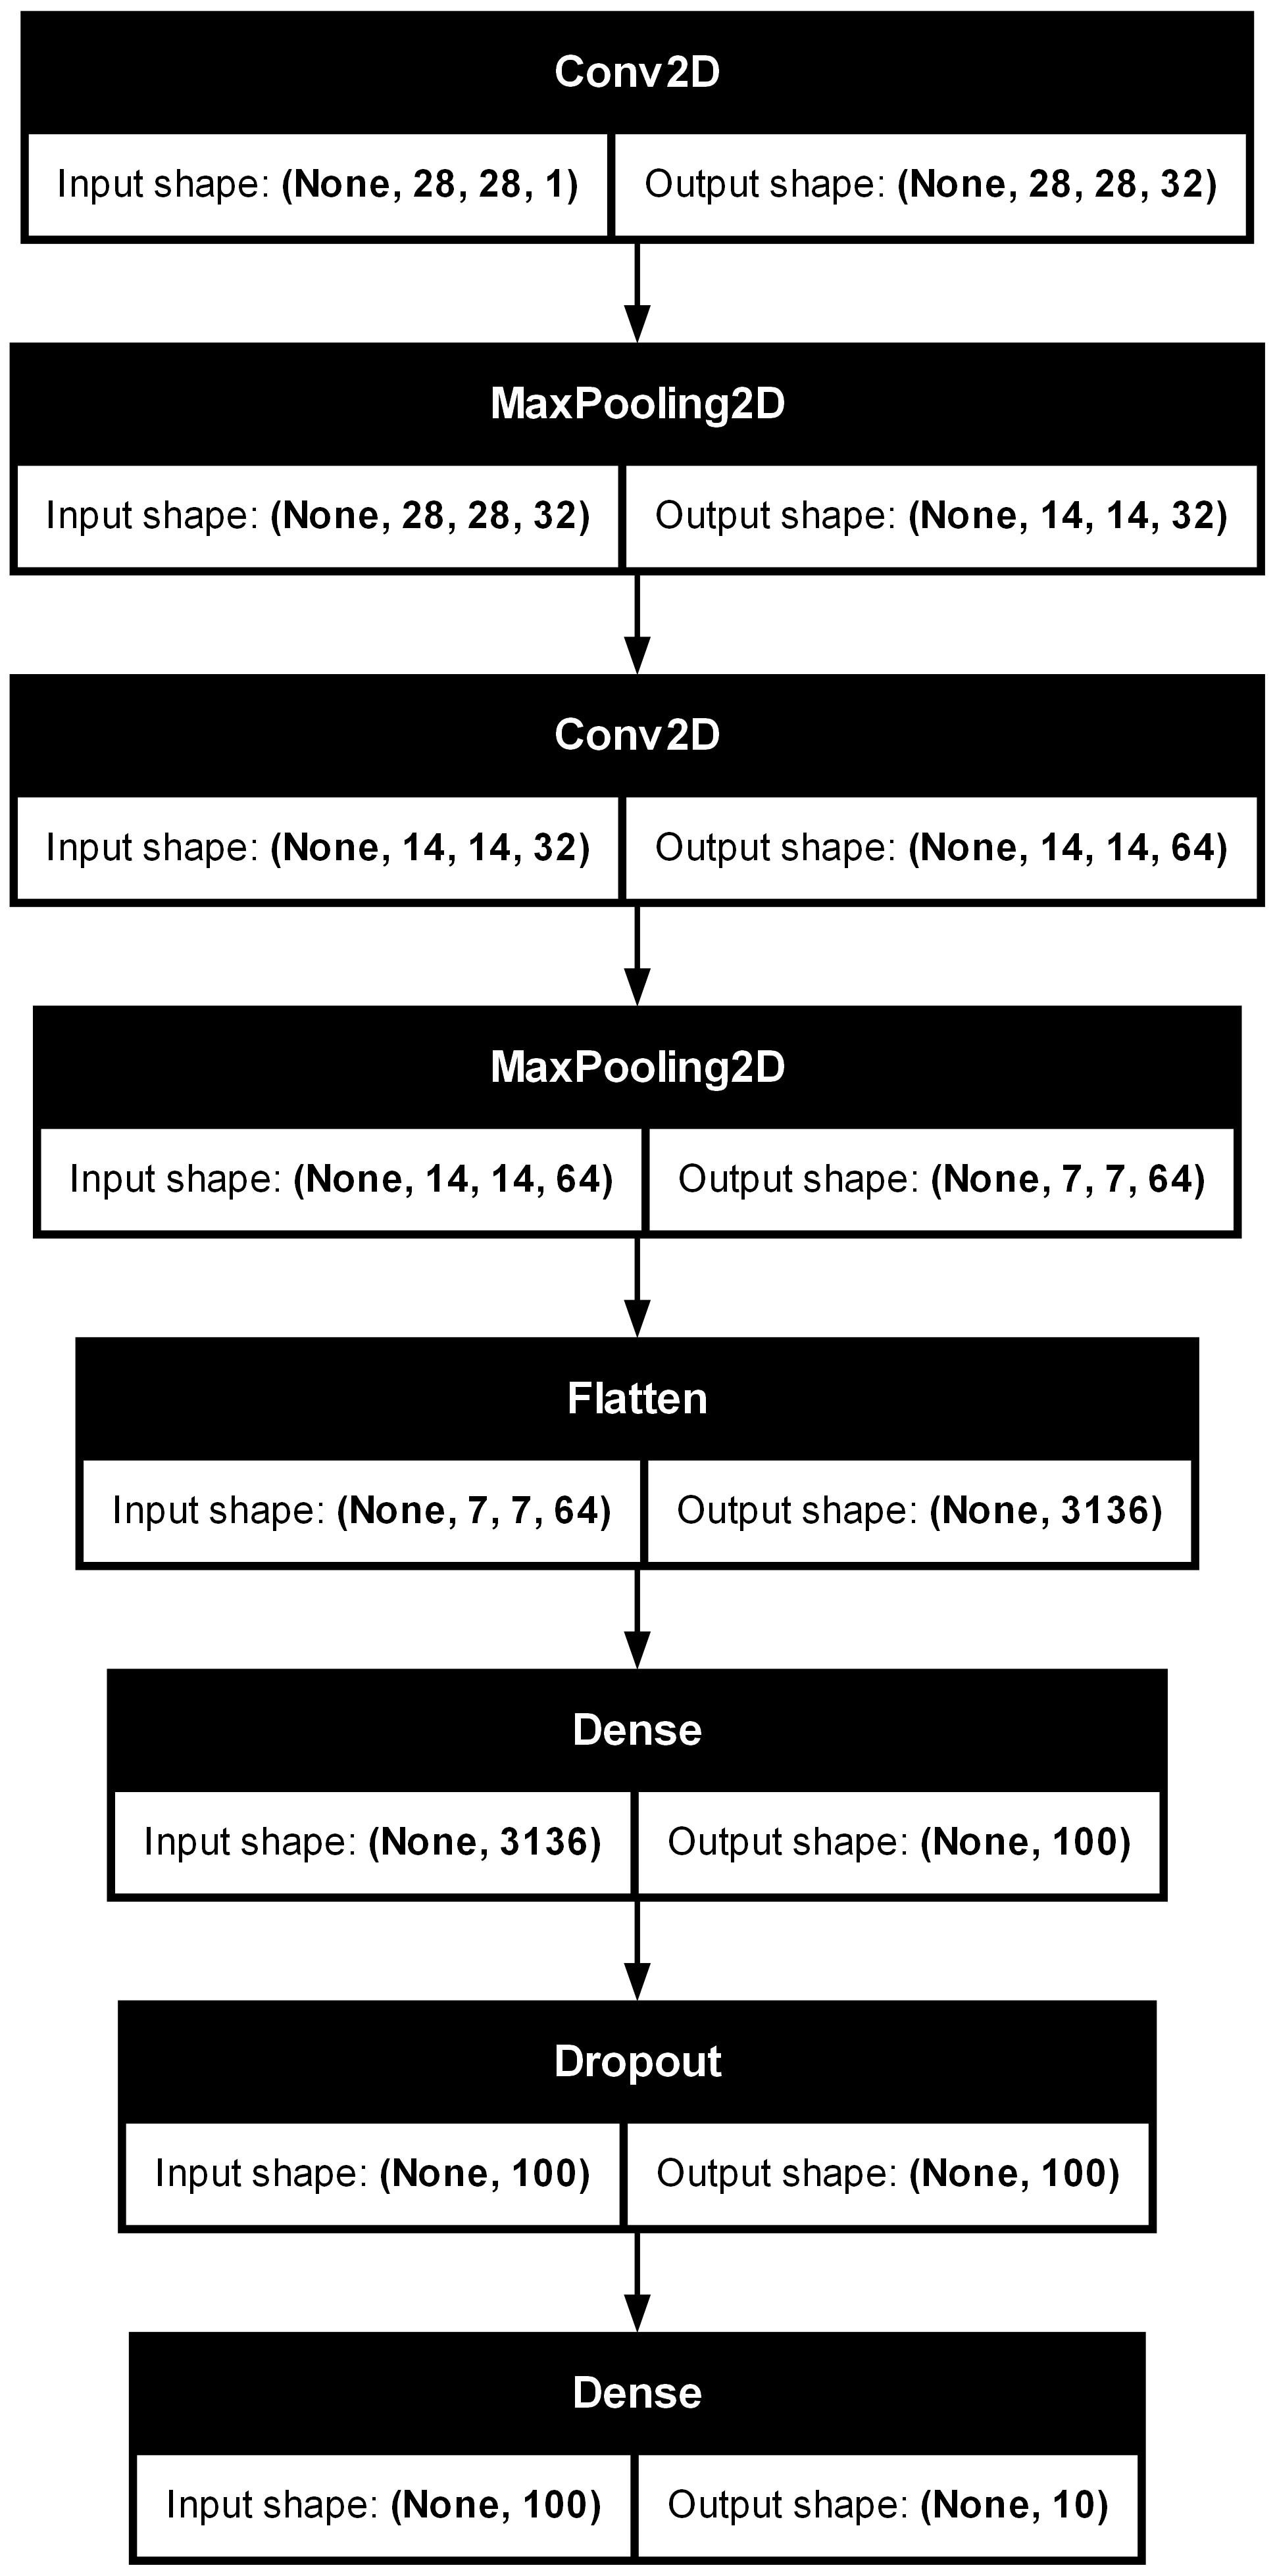

In [128]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn_a.png',dpi=300)

In [129]:
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

In [130]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                     validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7353 - loss: 0.7250 - val_accuracy: 0.8818 - val_loss: 0.3202
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8735 - loss: 0.3515 - val_accuracy: 0.8993 - val_loss: 0.2699
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8932 - loss: 0.2955 - val_accuracy: 0.9054 - val_loss: 0.2512
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9049 - loss: 0.2578 - val_accuracy: 0.9170 - val_loss: 0.2283
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9134 - loss: 0.2353 - val_accuracy: 0.9152 - val_loss: 0.2263
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9226 - loss: 0.2098 - val_accuracy: 0.9072 - val_loss: 0.2485
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9268 - loss: 0.1947 - val_accuracy: 0.9189 - val_loss: 0.2188
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9328 - loss: 0

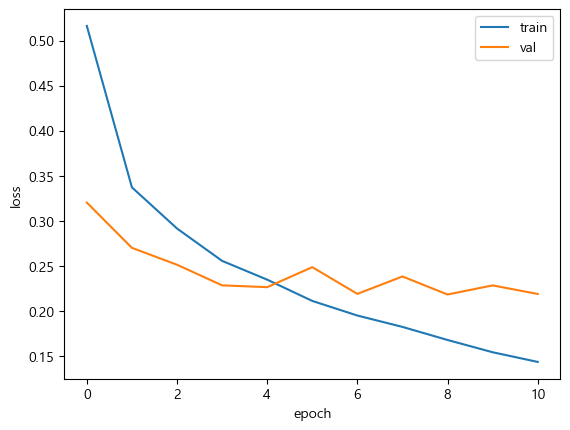

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [132]:
# stop 위치 출력
early_stopping_cb.stopped_epoch

10

In [133]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2141


[0.21814562380313873, 0.9240000247955322]

In [135]:
val_scaled[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.01568627, 0.        , 0.        , 0.57647059, 0.49019608,
        0.41568627, 0.4431

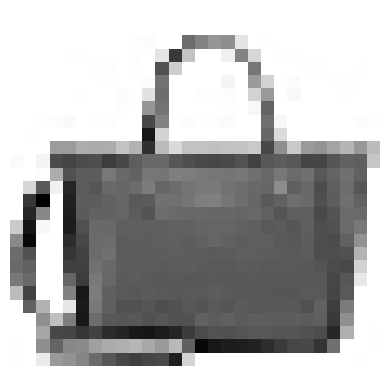

In [136]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [139]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.8716601e-18 1.5509976e-26 2.2781469e-19 1.4967549e-19 1.5739344e-16
  1.5569080e-18 9.0154941e-14 2.7758486e-18 1.0000000e+00 1.0904061e-18]]


In [140]:
predict[0]

array([1.8716601e-18, 1.5509976e-26, 2.2781469e-19, 1.4967549e-19,
       1.5739344e-16, 1.5569080e-18, 9.0154941e-14, 2.7758486e-18,
       1.0000000e+00, 1.0904061e-18], dtype=float32)

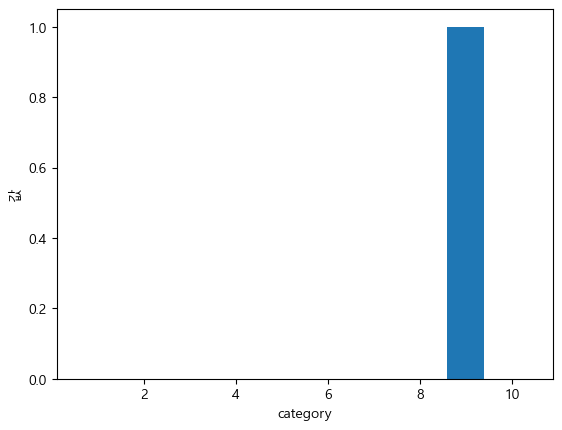

In [143]:
plt.bar(range(1,11),predict[0])
plt.xlabel('category')
plt.ylabel('값')
plt.show()

In [144]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [145]:
print(classes[np.argmax(predict)]) #np.argmax 최대값의 index값 리턴

가방


In [149]:
# test 세트 검증
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [150]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9141 - loss: 0.2450


[0.24005666375160217, 0.9164000153541565]

In [147]:
# 딥러닝 훈련
# 데이터 전처리 train_scaled = train_input.reshape(-1,28,28,1)/255

# 모델결정 model = keras.Sequential()

# 합성곱 신경망 (CNN) - 32(=필터)
# 1차 합성곱 신경망 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'), input_shape=(28,28,1)) 
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))

# 2차 합성곱 신경망 
# model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 조기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test 세트 검증 - 3차원 행렬로 변경 후 test 진행
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)